In [64]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data = pd.read_excel('fypdata.xlsx')

In [66]:
data.columns = ['Category', 'Offense_Code', '2019', '2020', '2021', '2022', '2023', '2024', 'Area']
data.head(5)


,Category,Offense_Code,2019,2020,2021,2022,2023,2024,Area
0,Catagory name,NaN,2019,2020,2021,2022,2023,2024,Area
1,bike theft,381a,121,117,135,90,135,156,RYK
2,theft,380,101,98,104,102,118,128,SDK
3,girl kidnaping,365b,30,31,38,32,40,46,RYK
4,electricity theft,462j,23,25,38,40,33,52,RYK


In [67]:
data = data.drop(0)
data.head(5)

,Category,Offense_Code,2019,2020,2021,2022,2023,2024,Area
1,bike theft,381a,121,117,135,90,135,156,RYK
2,theft,380,101,98,104,102,118,128,SDK
3,girl kidnaping,365b,30,31,38,32,40,46,RYK
4,electricity theft,462j,23,25,38,40,33,52,RYK
5,dacoty,392,65,55,56,70,68,88,BWP


In [68]:
for year in ['2019', '2020', '2021', '2022', '2023', '2024']:
    data[year] = pd.to_numeric(data[year], errors='coerce')

In [69]:
years = np.array([2019, 2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
predictions = {}

In [70]:
for i, row in data.iterrows():
    crime_data = row[['2019', '2020', '2021', '2022', '2023', '2024']].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(years, crime_data)
    future_predictions = model.predict(future_years)
    predictions[row['Category']] = future_predictions.flatten()

In [71]:
future_years_df = pd.DataFrame(predictions, index=[2025, 2026, 2027, 2028, 2029, 2030])
future_years_df = future_years_df.round(0).astype(int)
print("Predictions (2025-2030):\n", future_years_df)

Predictions (2025-2030):
       bike theft  theft  girl kidnaping  electricity theft  dacoty  us  \
2025         144    128              46                 52      84  22   
2026         149    133              49                 57      89  23   
2027         155    139              52                 62      93  25   
2028         160    144              55                 67      98  26   
2029         165    150              58                 72     103  27   
2030         170    155              61                 77     108  29   

      murder  check bounce  narcotics  fight  fight with women  sata bazi  
2025       7            30         31     77                45         14  
2026       8            30         31     77                47         14  
2027       8            31         32     77                50         14  
2028       9            32         32     77                52         14  
2029       9            33         32     77                55         14  

In [72]:
area_crime_data = data.groupby('Area')[['2019', '2020', '2021', '2022', '2023', '2024']].sum()
area_crime_data

,2019,2020,2021,2022,2023,2024
Area,,,,,,
BWP,107,94,112,126,111,146
RYK,270,274,298,233,297,371
SDK,157,166,160,161,164,209


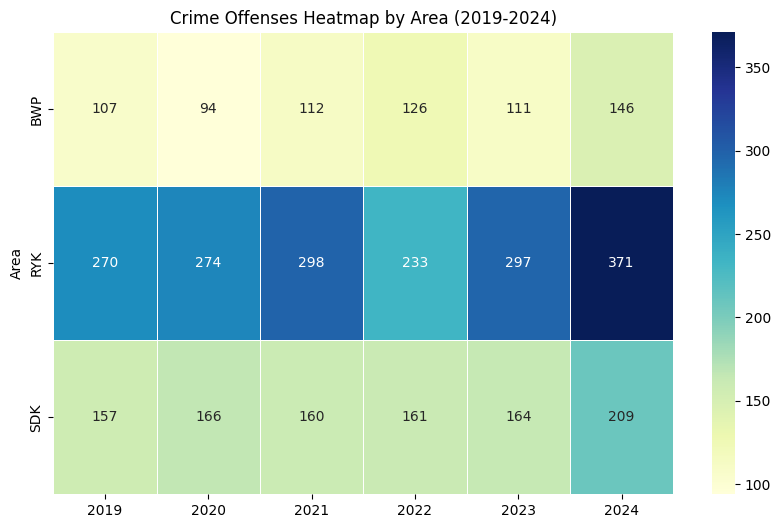

In [73]:
plt.figure(figsize=(10, 6))
sns.heatmap(area_crime_data, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5)
plt.title("Crime Offenses Heatmap by Area (2019-2024)")
plt.show()

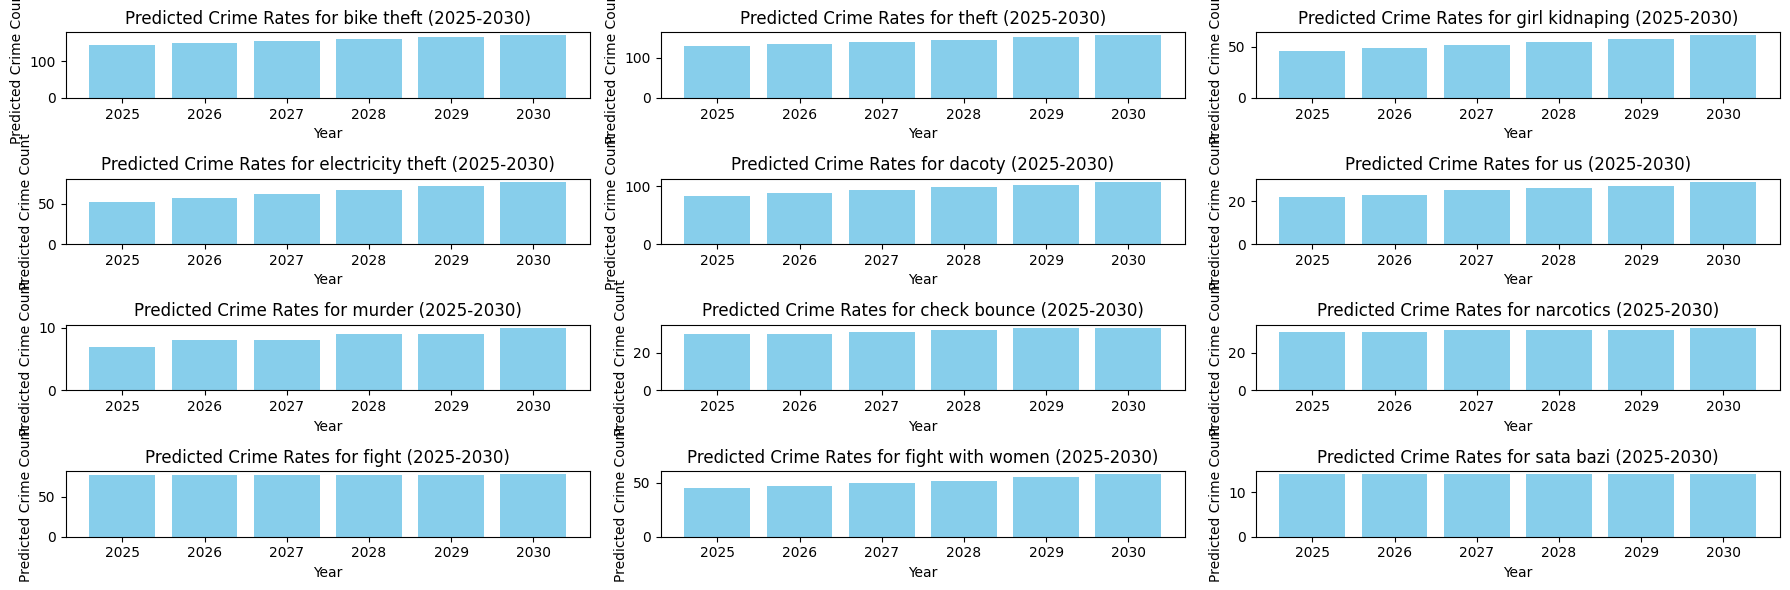

In [74]:
# future_years_df = pd.DataFrame(predictions, index=[2025, 2026, 2027, 2028, 2029, 2030])
# for crime in future_years_df.columns:
#     plt.figure(figsize=(8, 6))
#     plt.bar(future_years_df.index, future_years_df[crime], color='skyblue')
#     plt.title(f"Predicted Crime Rates for {crime} (2025-2030)")
#     plt.xlabel("Year")
#     plt.ylabel("Predicted Crime Count")
#     plt.xticks(future_years_df.index)
#     plt.show()
ncols = 3
nrows = (len(future_years_df.columns) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6))
axes = axes.flatten()

for i, crime in enumerate(future_years_df.columns):
    axes[i].bar(future_years_df.index, future_years_df[crime], color='skyblue')
    axes[i].set_title(f"Predicted Crime Rates for {crime} (2025-2030)")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Predicted Crime Count")
    axes[i].set_xticks(future_years_df.index)

plt.tight_layout()
plt.show()

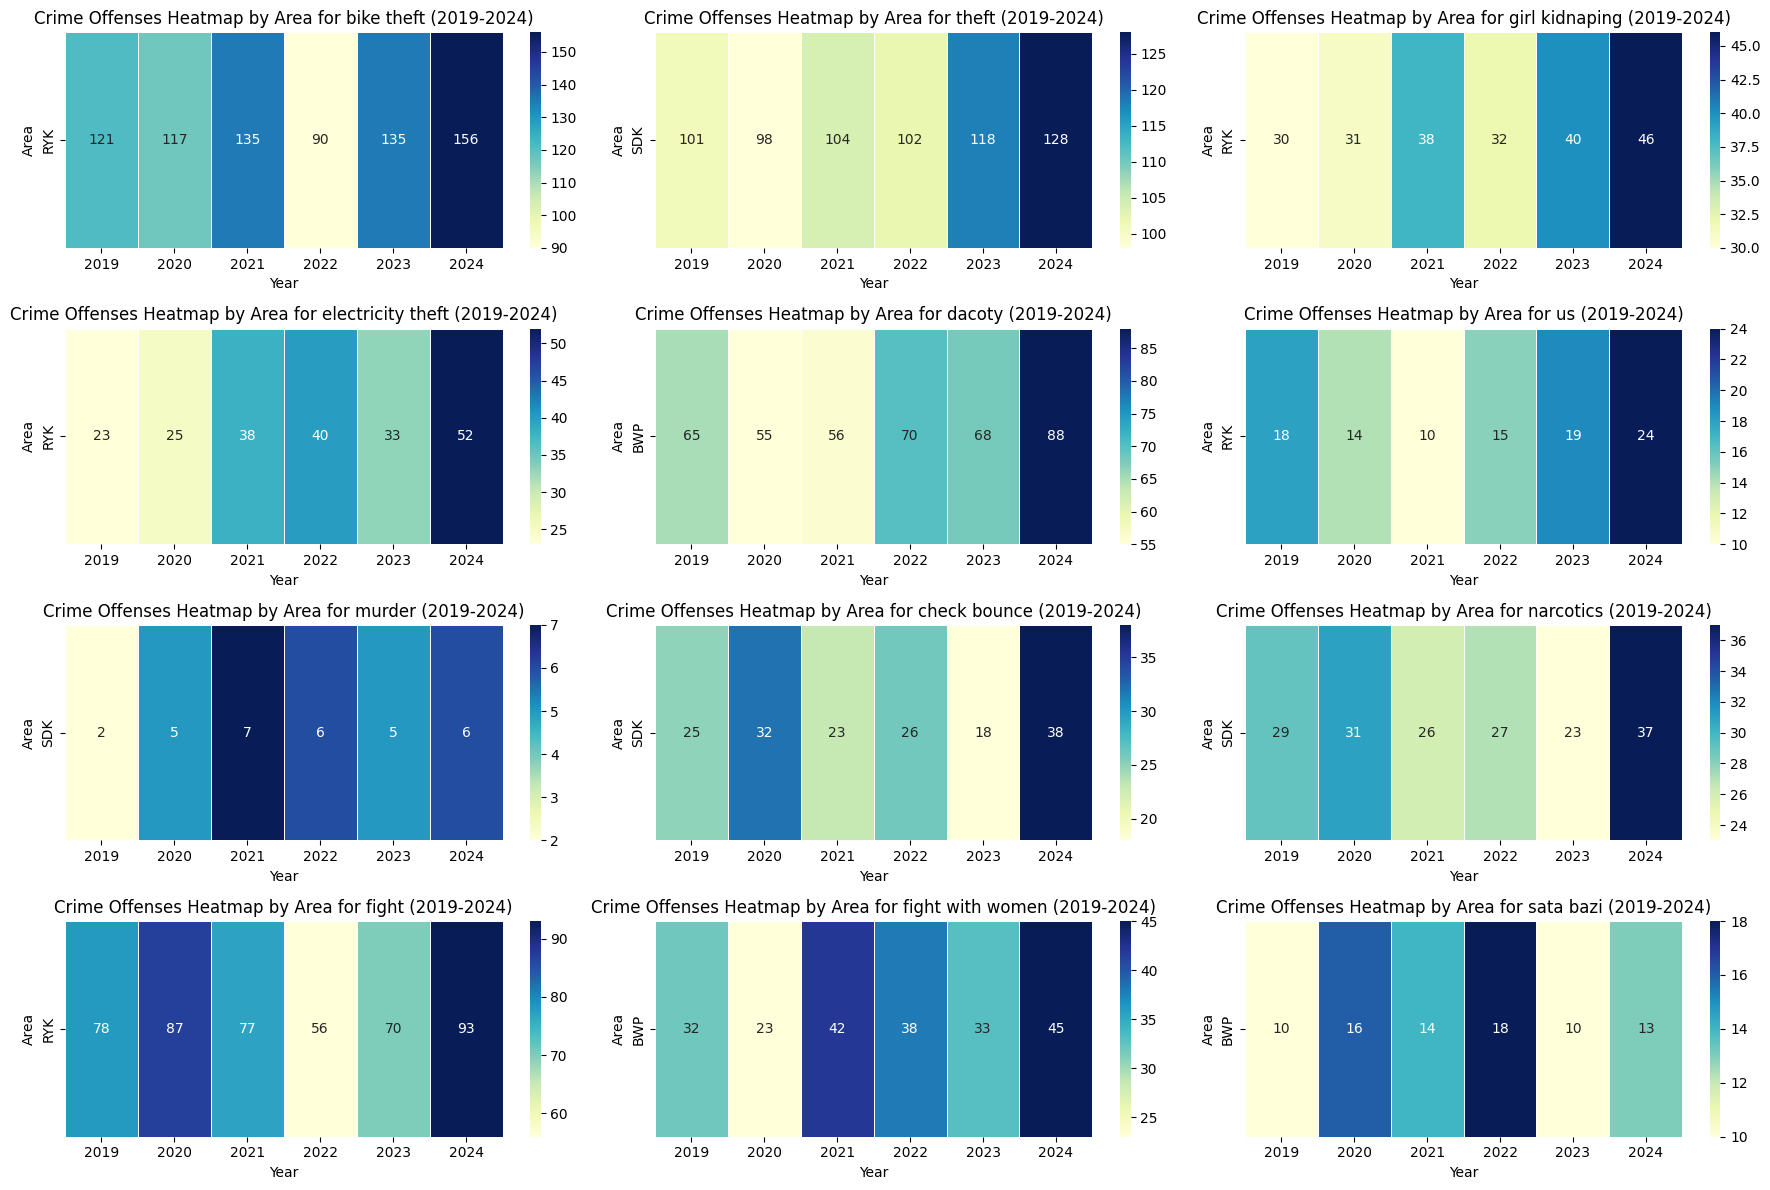

In [75]:
# for crime in data['Category'].unique():
#     crime_data = data[data['Category'] == crime].groupby('Area')[['2019', '2020', '2021', '2022', '2023', '2024']].sum()
#     plt.figure(figsize=(10, 6))
#     sns.heatmap(crime_data, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5)
#     plt.title(f"Crime Offenses Heatmap by Area for {crime} (2019-2024)")
#     plt.show()
ncols = 3
nrows = (len(data['Category'].unique()) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
axes = axes.flatten()

for i, crime in enumerate(data['Category'].unique()):
    crime_data = data[data['Category'] == crime].groupby('Area')[['2019', '2020', '2021', '2022', '2023', '2024']].sum()
    sns.heatmap(crime_data, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5, ax=axes[i])
    axes[i].set_title(f"Crime Offenses Heatmap by Area for {crime} (2019-2024)")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Area")

plt.tight_layout()
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_1932\2760537080.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_1932\2760537080.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_1932\2760537080.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_1932\2760537080.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixe

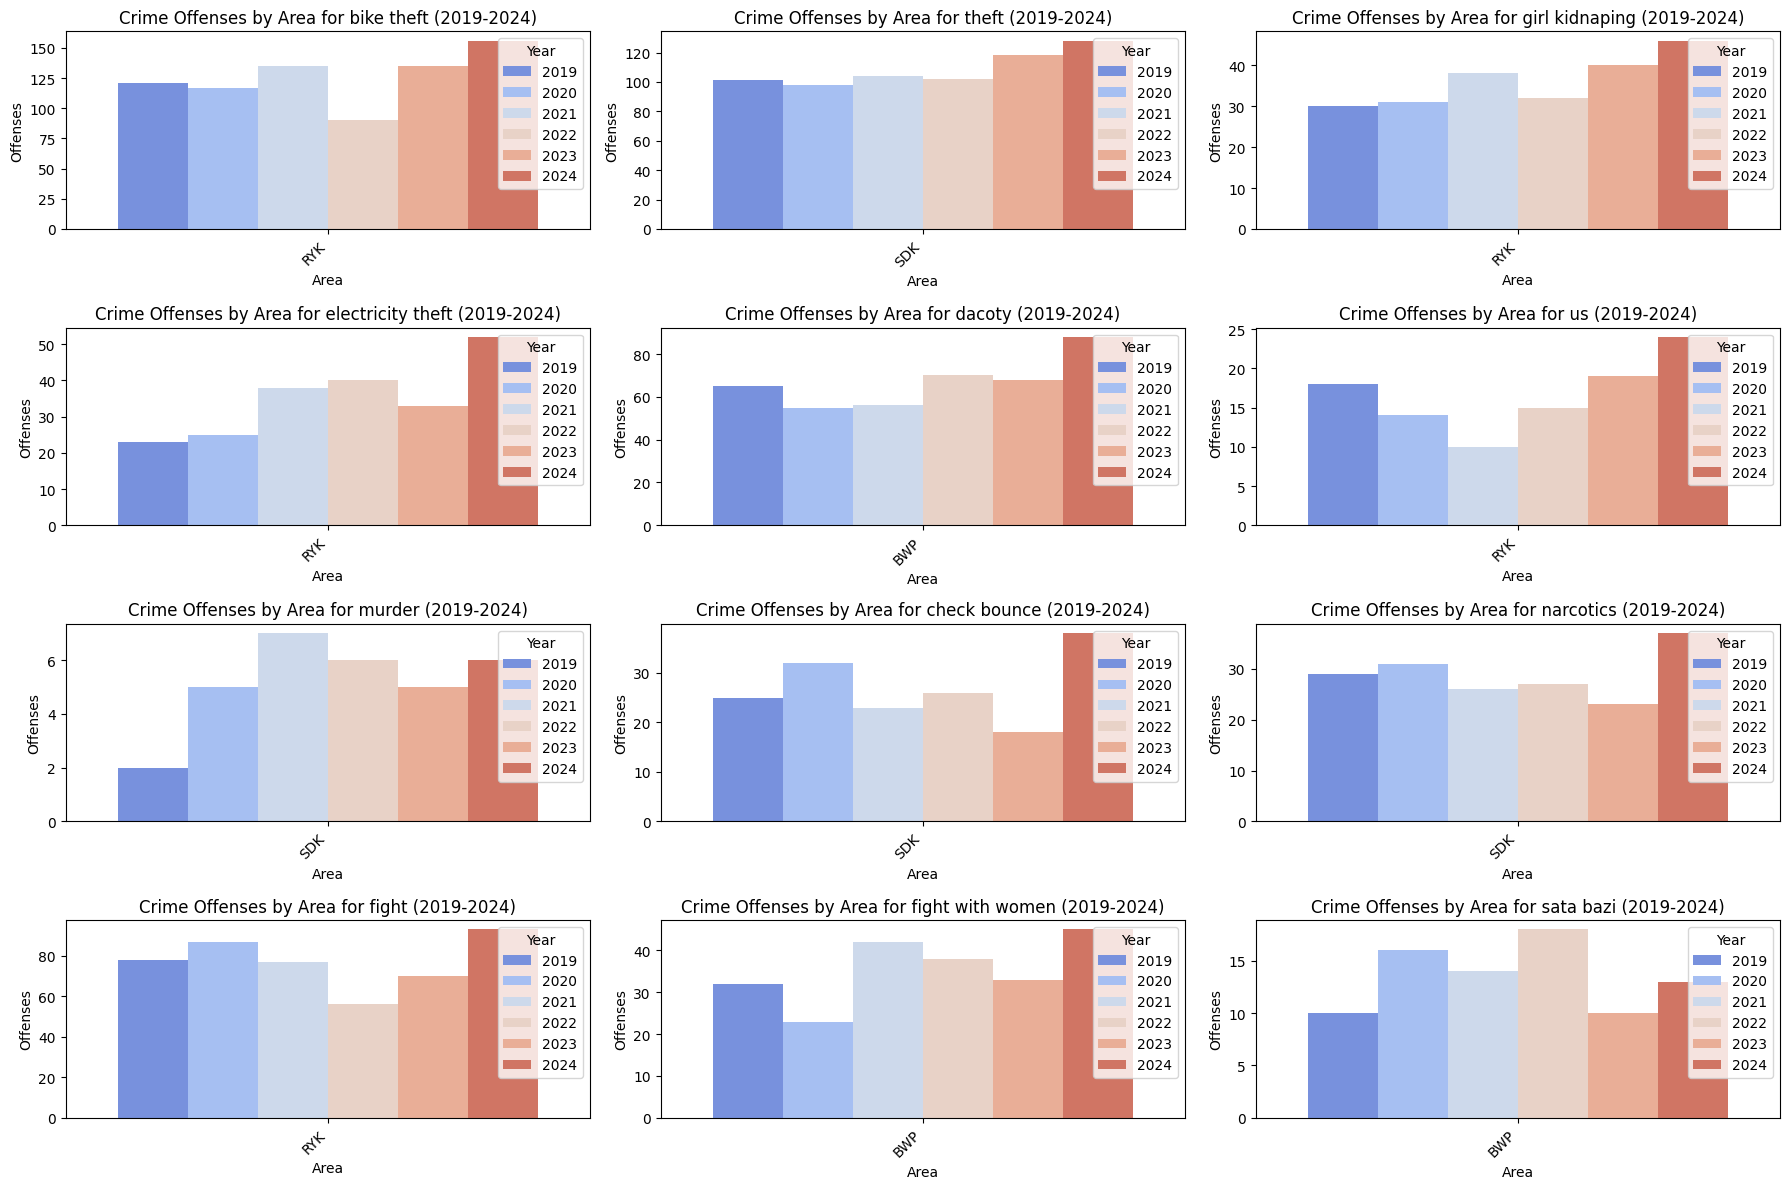

In [77]:
# for crime in data['Category'].unique():
#     crime_data = data[data['Category'] == crime].groupby('Area')[['2019', '2020', '2021', '2022', '2023', '2024']].sum().reset_index()
#     crime_data_melted = crime_data.melt(id_vars='Area', var_name='Year', value_name='Offenses')
#     plt.figure(figsize=(12, 8))
#     sns.barplot(x='Area', y='Offenses', hue='Year', data=crime_data_melted, palette='coolwarm')
#     plt.title(f"Crime Offenses by Area for {crime} (2019-2024)")
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()
ncols = 3
nrows = (len(data['Category'].unique()) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
axes = axes.flatten()

for i, crime in enumerate(data['Category'].unique()):
    crime_data = data[data['Category'] == crime].groupby('Area')[['2019', '2020', '2021', '2022', '2023', '2024']].sum().reset_index()
    crime_data_melted = crime_data.melt(id_vars='Area', var_name='Year', value_name='Offenses')
    sns.barplot(x='Area', y='Offenses', hue='Year', data=crime_data_melted, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"Crime Offenses by Area for {crime} (2019-2024)")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

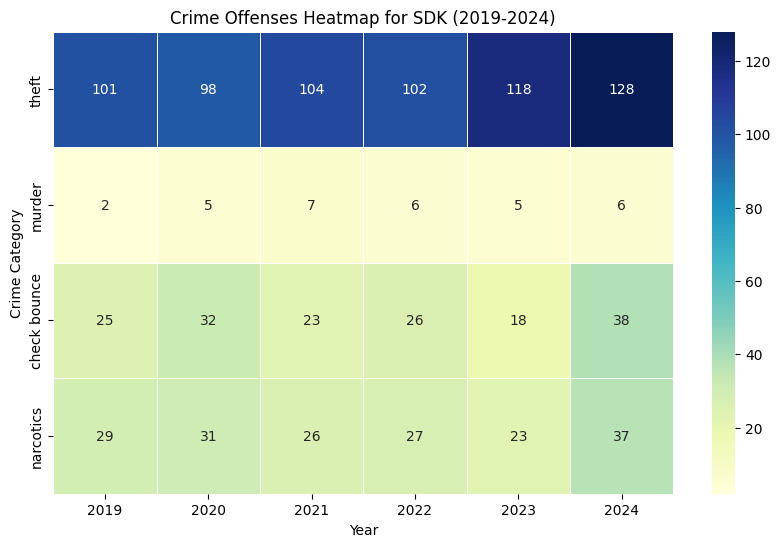

In [85]:
area_input = input("Enter the area name: ")
area_data = data[data['Area'].str.lower() == area_input.lower()]
if area_data.empty:
    print("No data found for the specified area.")
else:
    heatmap_data = area_data[['Category', '2019', '2020', '2021', '2022', '2023', '2024']]
    heatmap_data.set_index('Category', inplace=True)
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5)
    plt.title(f"Crime Offenses Heatmap for {area_input} (2019-2024)")
    plt.xlabel("Year")
    plt.ylabel("Crime Category")
    plt.show()


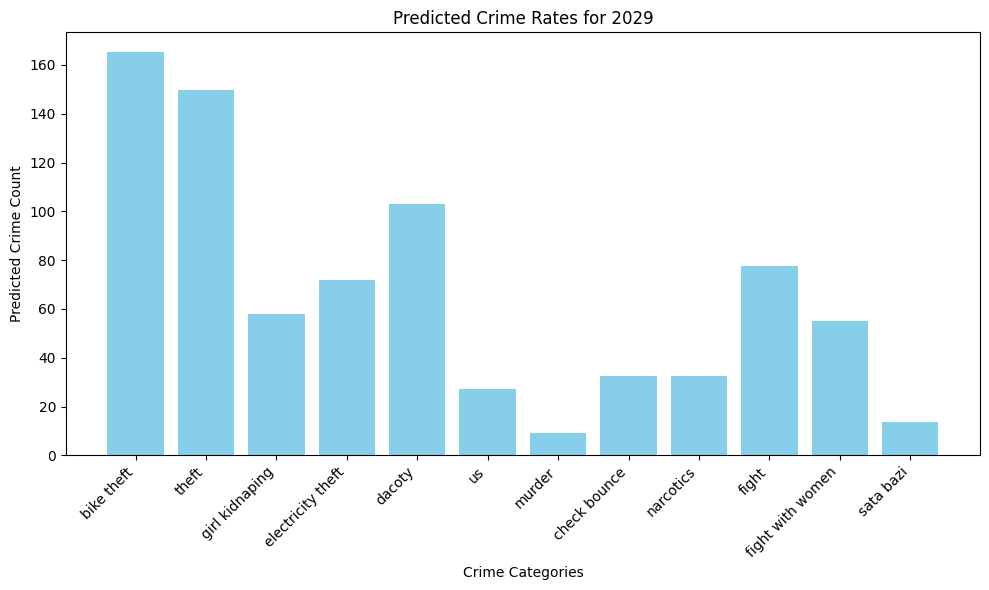

In [86]:
years = np.array([2019, 2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
predictions = {}

for i, row in data.iterrows():
    crime_data = row[['2019', '2020', '2021', '2022', '2023', '2024']].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(years, crime_data)
    future_predictions = model.predict(future_years)
    predictions[row['Category']] = future_predictions.flatten()

future_years_df = pd.DataFrame(predictions, index=[2025, 2026, 2027, 2028, 2029, 2030])

user_year = int(input("Enter a year between 2025 and 2030: "))

if user_year in future_years_df.index:
    predicted_crime_rates = future_years_df.loc[user_year]

    plt.figure(figsize=(10, 6))
    plt.bar(predicted_crime_rates.index, predicted_crime_rates.values, color='skyblue')
    plt.title(f"Predicted Crime Rates for {user_year}")
    plt.xlabel("Crime Categories")
    plt.ylabel("Predicted Crime Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Invalid year. Please enter a year between 2025 and 2030.")